In [1]:
import sys
sys.path.append("../")
from request.dao import Dao
from PyQt5.QtWidgets import QApplication
from pandas import DataFrame
from entity.stock import Stock
from request.enum.stockEnum import CandleUnit
import matplotlib.pyplot as plt

In [2]:
app = QApplication([])

In [3]:
Dao().login()

In [4]:
e_mart = Dao().request_stock_instance("104040")
print(e_mart.get_code_name())


104040


In [5]:
a= Dao().get_today_date()
a


'20210115'

In [6]:
data = Dao().request_candle_data(e_mart,CandleUnit.DAY,2)
data

,time,open,close,low,high,volume,ma5,ma10,ma20,ma60
0,2021-01-14,2700,2720,2660,2865,5598493,NaN,NaN,NaN,NaN
1,2021-01-13,2850,2705,2685,2870,6308152,NaN,NaN,NaN,NaN
2,2021-01-12,2745,2890,2705,3210,52952389,NaN,NaN,NaN,NaN
3,2021-01-11,2930,2820,2710,2970,10528078,NaN,NaN,NaN,NaN
4,2021-01-08,3045,2970,2895,3250,70076576,2821.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
495,2019-01-11,1715,1695,1660,1810,835200,1699.0,1756.5,1755.75,1855.500000
496,2019-01-10,1665,1695,1660,1725,581993,1692.0,1746.0,1753.50,1851.750000
497,2019-01-09,1650,1675,1635,1685,392782,1688.0,1730.5,1750.50,1847.166667
498,2019-01-08,1595,1645,1590,1645,553670,1678.0,1714.0,1744.75,1842.500000


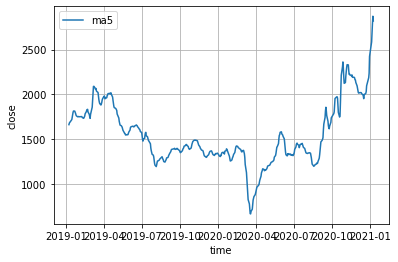

In [14]:

# plt.plot(data.time, data.ma5, label='ma5')
# plt.xlabel('time')
# plt.ylabel('close')
# plt.legend(loc="best")
# plt.grid()
# plt.show()

In [74]:
import mpl_finance 
import matplotlib.ticker as ticker
%matplotlib inline

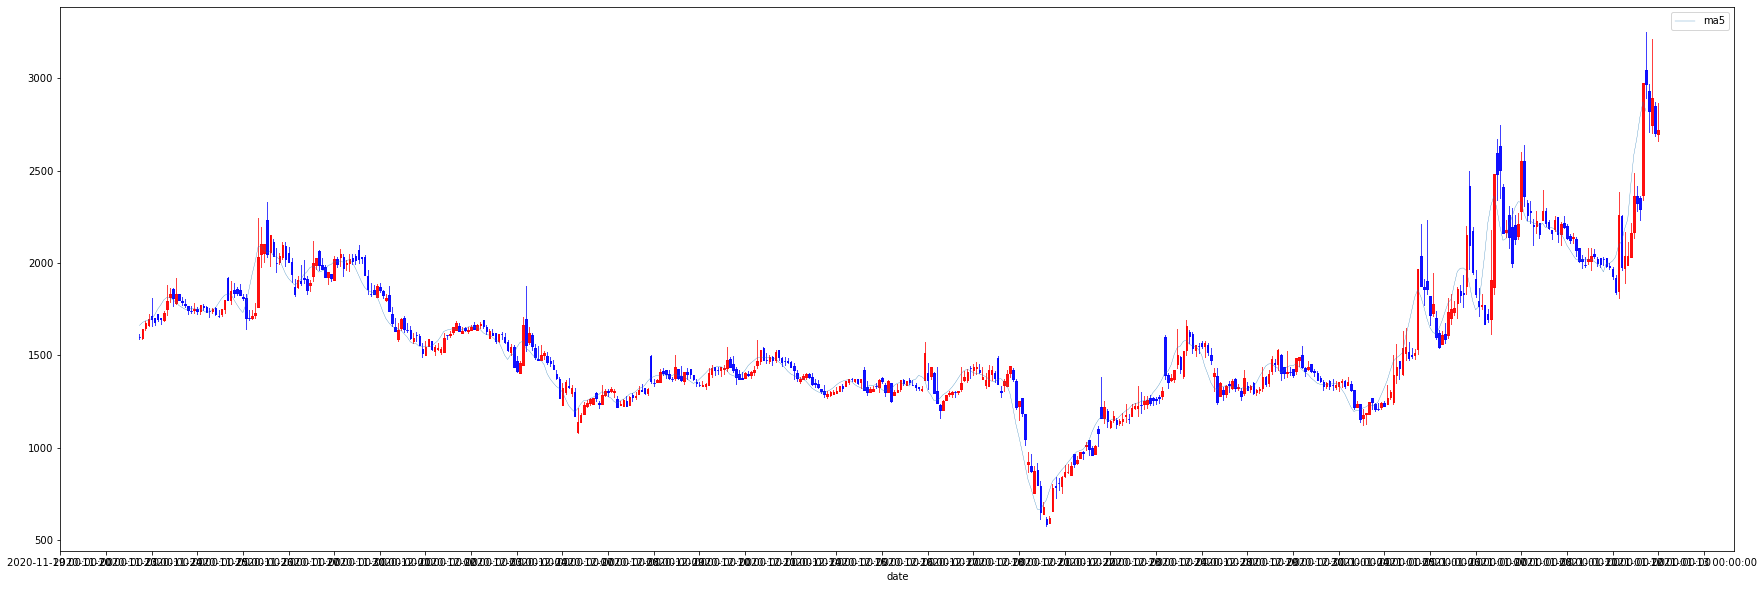

In [81]:
fig = plt.figure(figsize=(30,10))
ax=fig.add_subplot(111)

ax.plot(data.index, data.ma5, label="ma5", linewidth='0.3')
ax.xaxis.set_major_locator(ticker.MaxNLocator(50))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(data.time))
ax.invert_xaxis()
ax.set_xlabel("date")

mpl_finance.candlestick2_ohlc(ax, data.open, data.high, data.low, data.close, width=0.5, colorup='r', colordown='b')
plt.legend(loc="best")
plt.show()